In [84]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


Imports


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
%matplotlib inline

# Load the Data
I will work on Housing Price Prediction Dataset.
This dataset provides comprehensive information for house price prediction, with 13 column names:

* Price: The price of the house.
* Area: The total area of the house in square feet.
* Bedrooms: The number of bedrooms in the house.
* Bathrooms: The number of bathrooms in the house.
* Stories: The number of stories in the house.
* Mainroad: Whether the house is connected to the main road (Yes/No).
* Guestroom: Whether the house has a guest room (Yes/No).
* Basement: Whether the house has a basement (Yes/No).
* Hot water heating: Whether the house has a hot water heating system (Yes/No).
* Airconditioning: Whether the house has an air conditioning system (Yes/No).
* Parking: The number of parking spaces available within the house.
* Prefarea: Whether the house is located in a preferred area (Yes/No).
* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)
files=os.listdir(path)
for file in files:
  print(file)


Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1
Housing.csv


In [19]:
housing_df=pd.read_csv(path+'/Housing.csv')

# **Exploratory Data Analysis**

1. Data Understanding

* Dataframe ```shape```
* ```head``` and ```tail```
* ```dtypes```
* ```describe```

In [20]:
housing_df.shape

(545, 13)

In [23]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
housing_df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [27]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


2. Data Preparation
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [33]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,basement,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,no,yes,2,yes
1,12250000,8960,4,4,4,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,2,yes
3,12215000,7500,4,2,2,yes,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,2,no


In [32]:
housing_df=housing_df[['price', 'area', 'bedrooms', 'bathrooms', 'stories',
        'basement', 'airconditioning',
       'parking', 'prefarea']].copy()

In [34]:
housing_df.shape

(545, 9)

In [35]:
housing_df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
basement,object
airconditioning,object
parking,int64
prefarea,object


In [38]:
housing_df=housing_df.rename(columns={'price':'Price',
                           'area':'Area',
                           'bedrooms':'Bedrooms',
                           'bathrooms':'Bathrooms',
                           'stories':'Stories',
                           'basement':'Basement',
                           'airconditioning':'Airconditioning',
                           'parking':'Parking',
                           'prefarea':'Prefarea'})

In [39]:
housing_df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Basement,Airconditioning,Parking,Prefarea
0,13300000,7420,4,2,3,no,yes,2,yes
1,12250000,8960,4,4,4,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,2,yes
3,12215000,7500,4,2,2,yes,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,2,no


In [41]:
housing_df.isna().sum()

,0
Price,0
Area,0
Bedrooms,0
Bathrooms,0
Stories,0
Basement,0
Airconditioning,0
Parking,0
Prefarea,0


In [43]:
housing_df.loc[housing_df.duplicated()]

,Price,Area,Bedrooms,Bathrooms,Stories,Basement,Airconditioning,Parking,Prefarea


3. Feature Understanding
* Plotting Feature Distributions
  * Histogram
  * KDE
  * Boxplot

In [44]:
housing_df['Price'].value_counts()

,count
Price,
3500000,17
4200000,17
4900000,12
3150000,9
5600000,9
...,...
6580000,1
4319000,1
4375000,1


Text(0, 0.5, 'Count')

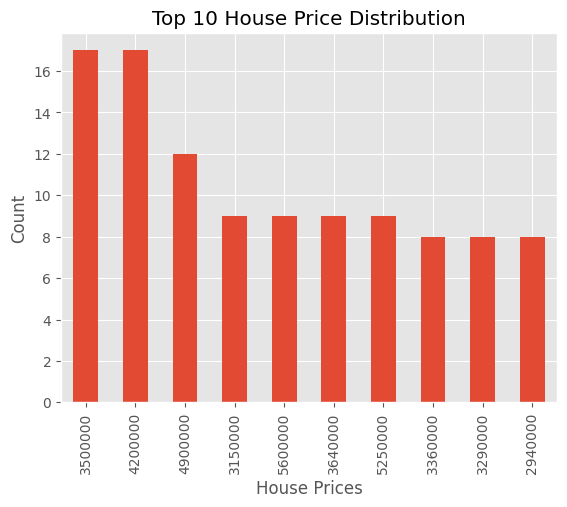

In [51]:
ax=housing_df['Price'].value_counts()\
.head(10)\
.plot(kind='bar',title='Top 10 House Price Distribution')
ax.set_xlabel('House Prices')
ax.set_ylabel('Count')

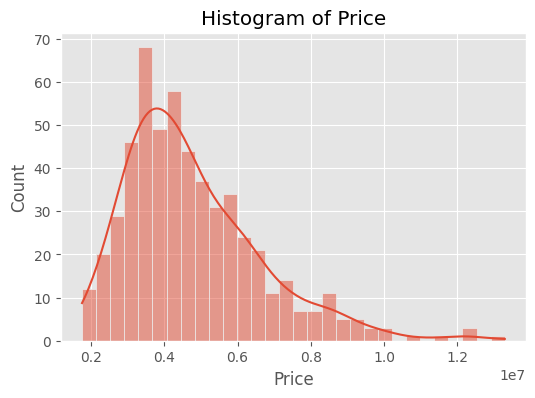

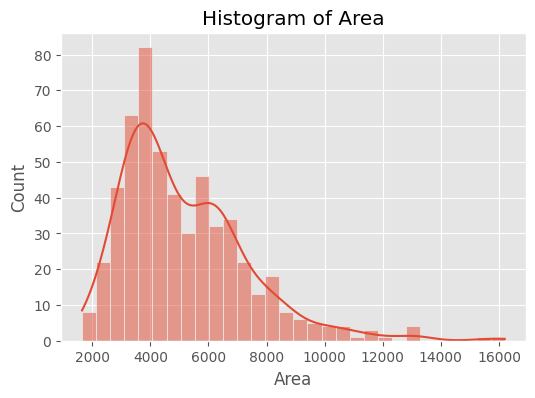

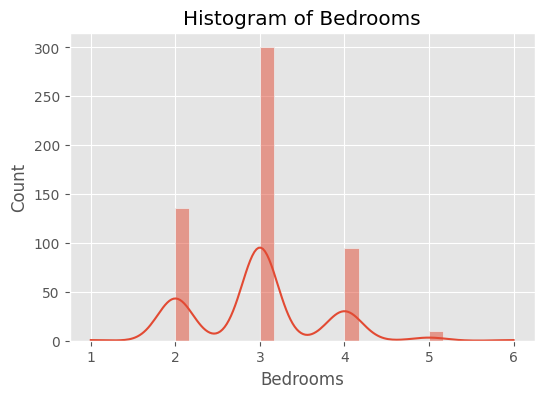

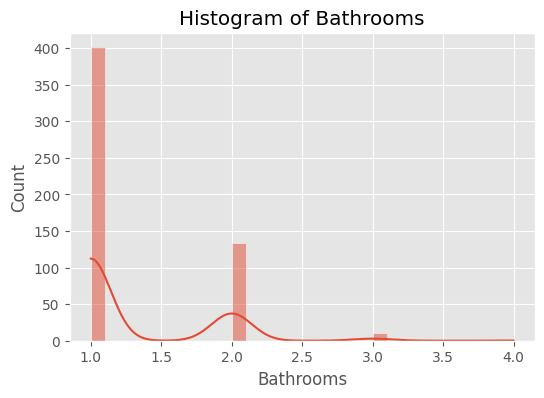

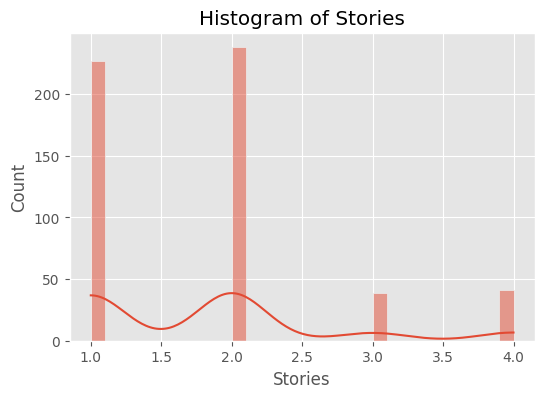

In [60]:
numeric_cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories',]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(housing_df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

Text(0.5, 0, 'Area')

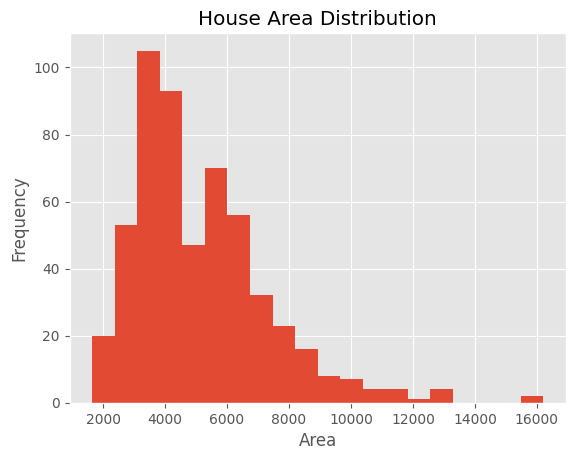

In [56]:
ax=housing_df['Area'].plot(kind='hist',
                           title='House Area Distribution',
                           bins=20)
ax.set_xlabel('Area')

Text(0.5, 0, 'Area')

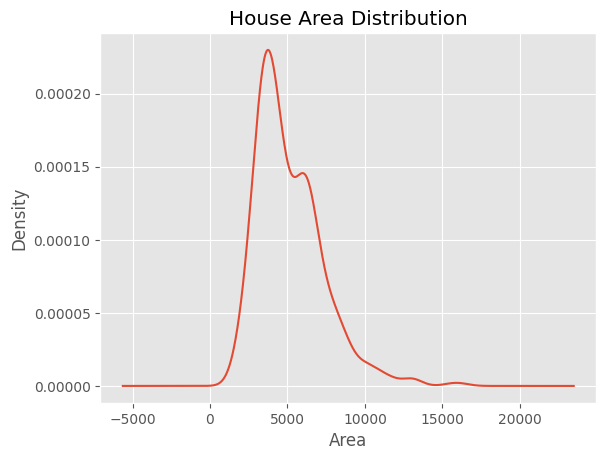

In [58]:
ax=housing_df['Area'].plot(kind='kde',
                           title='House Area Distribution')
ax.set_xlabel('Area')

4. Feature Relationships
* Scatterploy
* Heatmap Correlation
* Pairplot
* Groupby comparisons

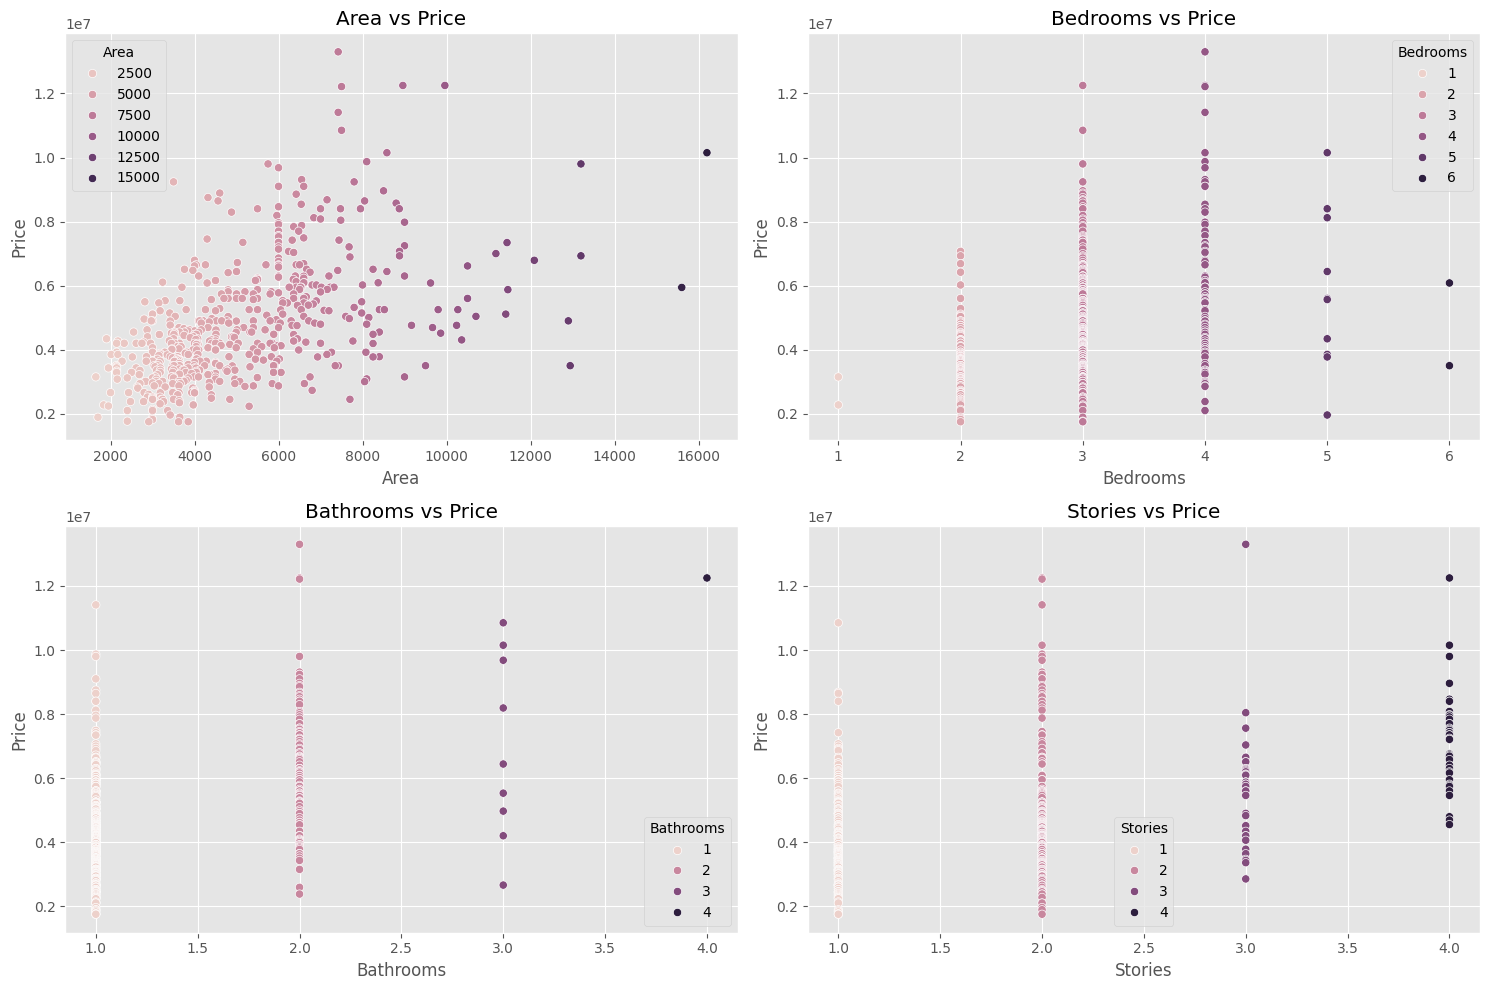

In [71]:
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Stories']

fig,axes=plt.subplots(2,2,figsize=(15,10))
axes=axes.flatten()

for i,col in enumerate(numeric_cols):
  sns.scatterplot(x=col,y='Price',data=housing_df,ax=axes[i],hue=f'{col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Price')
  axes[i].set_title(f'{col} vs Price')
plt.tight_layout()
plt.show()

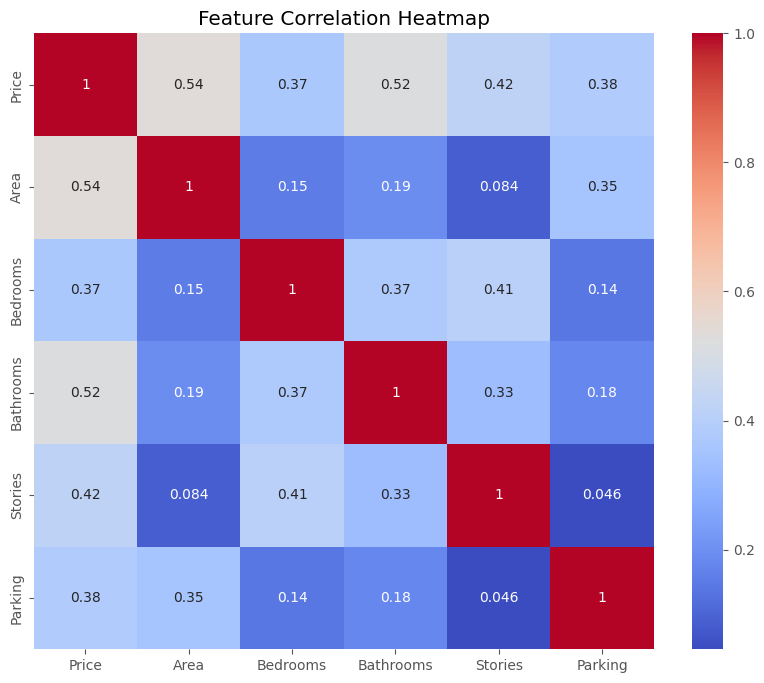

In [73]:
plt.figure(figsize=(10,8))
sns.heatmap(housing_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

5. Ask a Question about the Data
  
  * Try to answer a question you have about the data using a plot or statistic.

*Does a larger house area always lead to a higher price?*

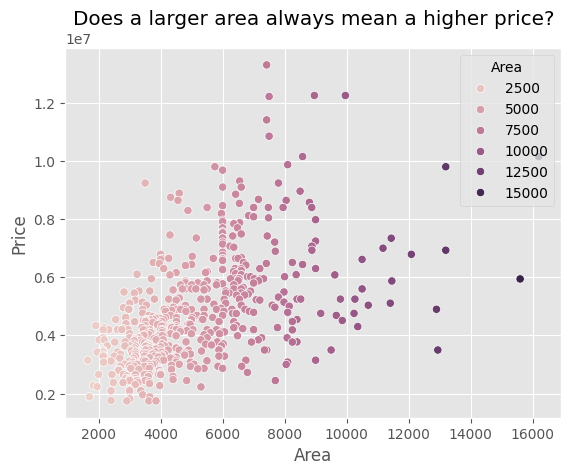

Correlation between area and price: 0.5359973457780797


In [78]:
sns.scatterplot(x=housing_df['Area'], y=housing_df['Price'],hue=housing_df['Area'])
plt.title("Does a larger area always mean a higher price?")
plt.show()

corr_area_price = housing_df['Area'].corr(housing_df['Price'])
print(f"Correlation between area and price: {corr_area_price}")

*Does the number of parking spaces impact house prices?*

In [79]:
housing_df.groupby('Parking')['Price'].agg(['mean', 'median', 'count', 'max'])


,mean,median,count,max
Parking,,,,
0,4.136017e+06,3850000.0,299,10150000
1,5.190389e+06,4690000.0,126,9800000
2,5.896328e+06,5302500.0,108,13300000
3,5.867167e+06,4375000.0,12,12250000


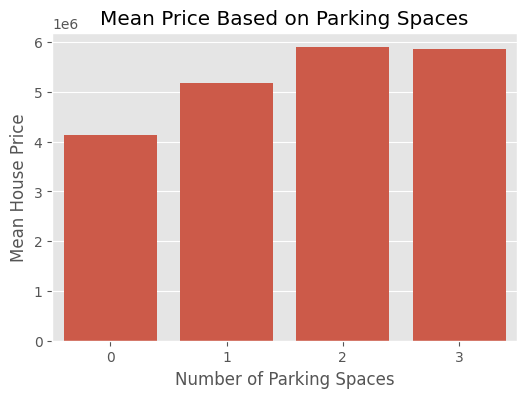

In [83]:
parking_group = housing_df.groupby('Parking')['Price'].agg(['mean', 'median'])

plt.figure(figsize=(6,4))
sns.barplot(x=parking_group.index, y=parking_group['mean'])
plt.title("Mean Price Based on Parking Spaces")
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Mean House Price")
plt.show()